# Fuel type

In [46]:
import pandas as pd

# Lee el archivo TSV
df = pd.read_csv('used_cars_data.csv', sep=",", encoding="latin8")

# Muestra las primeras filas
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


# Informe Estadístico Python

Pepe Barbero, Andreu Picornell y Carlos Portillo

Este dataset proporciona información detallada sobre coches usados en venta en distintas ciudades de la India. Contiene datos relevantes que incluyen la marca y modelo del vehículo, el año de fabricación, el tipo de combustible, el tipo de transmisión, la cantidad de kilómetros recorridos, la potencia del motor, y el precio tanto de coches nuevos como usados, entre otros atributos importantes. La estructura del dataset es la siguiente:

* **S.No.**: Número de serie.
* **Name**: Nombre del coche que incluye la marca y el modelo.
* **Location**: La ubicación en la que se está vendiendo o está disponible para la compra (ciudades).
* **Year**: Año de fabricación del coche.
* **Kilometers_driven**: El total de kilómetros recorridos por el coche por el/los dueño(s) anterior(es) en KM.
* **Fuel_Type**: El tipo de combustible que usa el coche (Gasolina, Diésel, Eléctrico, CNG, LPG).
* **Transmission**: El tipo de transmisión que usa el coche (Automático/Manual).
* **Owner**: Tipo de propiedad.
* **Mileage**: El kilometraje estándar ofrecido por la empresa del coche en kmpl o km/kg.
* **Engine**: El volumen de desplazamiento del motor en CC.
* **Power**: La potencia máxima del motor en bhp.
* **Seats**: El número de asientos en el coche.
* **New_Price**: El precio de un coche nuevo del mismo modelo en INR Lakhs (1 Lakh = 100,000).
* **Price**: El precio del coche usado en INR Lakhs (1 Lakh = 100,000).

Este conjunto de datos es ideal para el análisis y la construcción de modelos de predicción que permitan estimar el precio de un coche usado basándose en sus características.Dicho análisis nos facilita una mejor comprensión y evaluación del valor de mercado de los coches de segunda mano.



In [47]:
# Extraer la primera palabra de la columna 'Name' como la marca del coche
df['Brand'] = df['Name'].apply(lambda x: x.split()[0])

# Mostrar las primeras filas con la nueva columna 'Brand'
df[['Name', 'Brand']].head()


,Name,Brand
0,Maruti Wagon R LXI CNG,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai
2,Honda Jazz V,Honda
3,Maruti Ertiga VDI,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Audi


# Sacar la media del precio

In [48]:
df.loc[:, 'Price'].dropna().describe()

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

In [49]:
df.loc[:, 'Price'].dropna().mean()

9.47946835022429

Hacemos .describe() para obtener

# Saca el Box-Whiskers

In [50]:
df.boxplot(column=['Price'])

<Axes: >

Describir que es lo que vemos en la gráfica, además añadimos una mención a los datos optenidos en el punto anterior

Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Name: count, dtype: int64


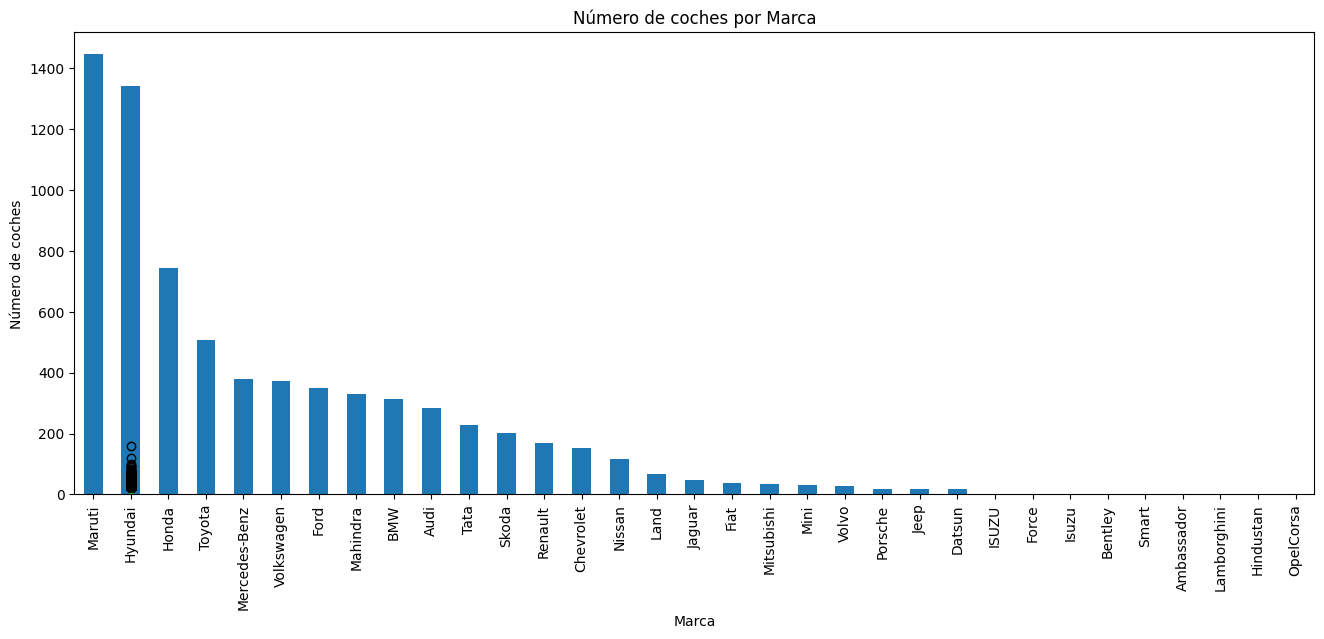

In [51]:
import matplotlib.pyplot as plt

brand_counts = df['Brand'].value_counts()
print(brand_counts.head())

brand_counts.plot(kind='bar', figsize=(16, 6))
plt.title('Número de coches por Marca')
plt.xlabel('Marca')
plt.ylabel('Número de coches')
plt.xticks(rotation=90)
plt.show()


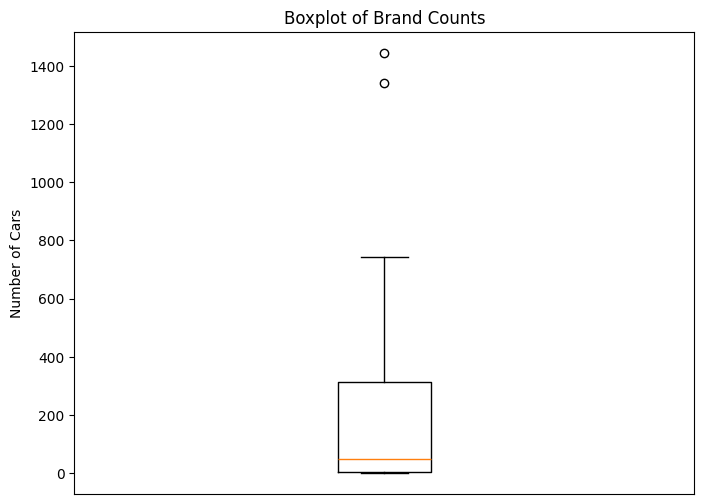

In [52]:
import matplotlib.pyplot as plt

# Extract values from the brand_counts Series
brand_counts_values = brand_counts.values

# Create the boxplot using matplotlib directly
plt.figure(figsize=(8, 6))
plt.boxplot(brand_counts_values)
plt.title('Boxplot of Brand Counts')
plt.ylabel('Number of Cars')
plt.xticks([])  # Remove x-axis ticks since they are not relevant here
plt.show()

# MATRIZ DE CORRELACIÓN

In [53]:
df['power'] = df['Power'].str.extract('(\d+)').astype(float)

selected_columns = df[['Price', 'Year','Kilometers_Driven', 'power']]
corr_matrix = selected_columns.corr(method='pearson')
corr_matrix


,Price,Year,Kilometers_Driven,power
Price,1.000000,0.305327,-0.011493,0.772480
Year,0.305327,1.000000,-0.187859,0.012439
Kilometers_Driven,-0.011493,-0.187859,1.000000,0.030463
power,0.772480,0.012439,0.030463,1.000000


En esta parte se ha realizado una matriz de correlación de la que podemos extraer las siguientes conclusiones:

* **Price vs. power (0.772)**

Existe una correlación positiva alta entre el precio y la potencia (power). Esto sugiere que, en general, a mayor potencia del vehículo, mayor es el precio. Este resultado es lógico, ya que los vehículos con motores más potentes suelen tener un precio más alto debido a su mejor desempeño y características avanzadas.

* **Price vs. Year (0.305)** -> Hacer una comparación por antigüedad

La correlación positiva moderada entre el precio y el año del vehículo sigue presente, indicando que los vehículos más nuevos tienden a tener un precio más alto, aunque otros factores también podrían influir en esta relación.

* **Price vs. Kilometers_Driven (-0.011)**

La correlación entre el precio y los kilómetros recorridos sigue siendo muy baja, lo que implica que en tu conjunto de datos, la cantidad de kilómetros recorridos no es un factor significativo para el precio del vehículo.


# Saca la distribución del precio

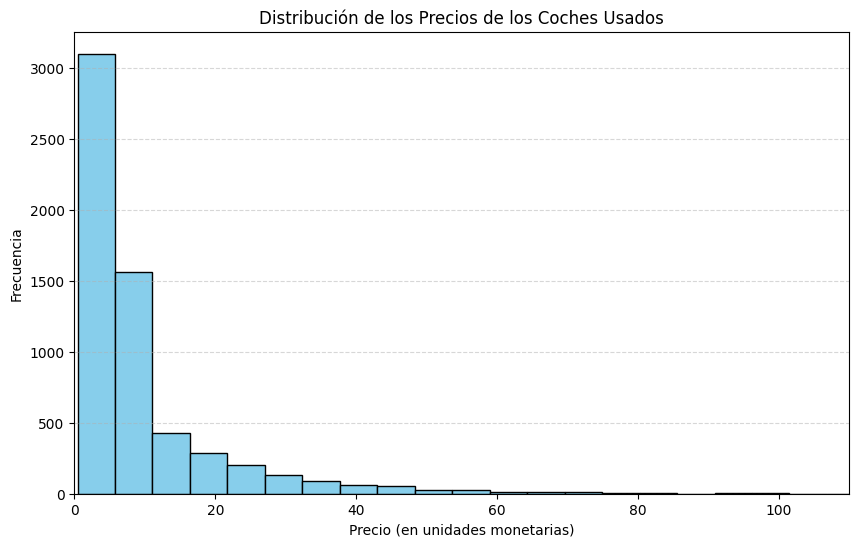

In [10]:
import matplotlib.pyplot as plt

# Limpiar los datos eliminando valores nulos de la columna 'Price'
prices = df['Price'].dropna()

# Graficar un histograma de la columna 'Price'
plt.figure(figsize=(10, 6))
plt.hist(prices, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de los Precios de los Coches Usados')
plt.xlabel('Precio (en unidades monetarias)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlim(0, 110)
plt.show()


Calcula la distribución que más se ajusta

In [11]:
from scipy import stats

dist_names = ['norm', 'expon', 'gamma']
best_fit = {}
prices = df['Price'].dropna()

for dist_name in dist_names:
    dist = getattr(stats, dist_name)
    param = dist.fit(prices)
    best_fit[dist_name] = stats.kstest(prices, dist_name, args=param).statistic

print("Mejor ajuste:", min(best_fit, key=best_fit.get))

Mejor ajuste: expon


Sabiendo que la distribución del precio es exponencial calcula la probabilidad de que la variable tome un valor menor a 3

In [12]:
from scipy.stats import expon

# Parámetro de la distribución (1/lambda)
beta = 2  # media de la distribución exponencial

# Calcular la probabilidad de que la variable tome un valor <= x
x = 3  # ejemplo de valor
probabilidad = expon.cdf(x, scale=beta)

print(f"La probabilidad de que la variable tome un valor menor o igual a {x} es: {probabilidad:.4f}")

La probabilidad de que la variable tome un valor menor o igual a 3 es: 0.7769


# Distribución de los caballos de los coches

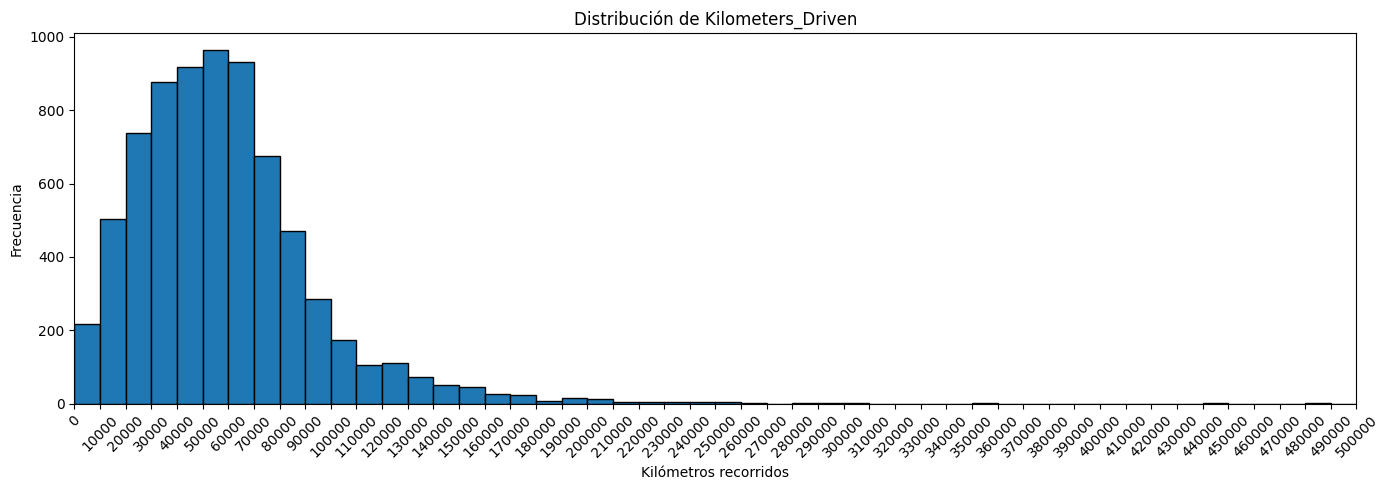

In [13]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.arange(0, 500000 + 10000, 10000)

plt.figure(figsize=(14, 5))
plt.hist(df['Kilometers_Driven'], bins=bins, edgecolor='black')
plt.title('Distribución de Kilometers_Driven')
plt.xlabel('Kilómetros recorridos')
plt.ylabel('Frecuencia')
plt.xlim(0, 500000)  # Limitar el eje x a 500,000 km
plt.xticks(bins, rotation=45)  # Configurar las etiquetas del eje x para cada 10,000 km

plt.tight_layout()
plt.show()


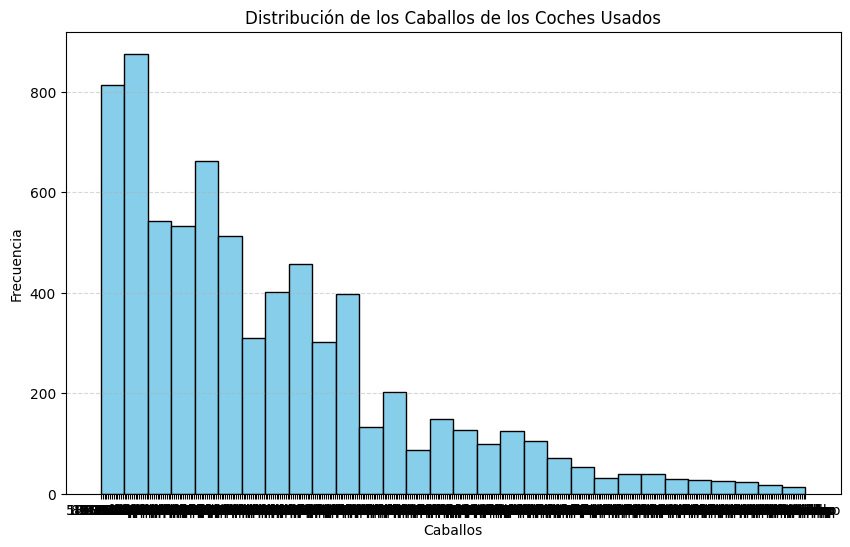

In [14]:
# Limpiar los datos eliminando valores nulos de la columna 'Price'
prices = df['Power'].dropna()

# Graficar un histograma de la columna 'Price'
plt.figure(figsize=(10, 6))
plt.hist(prices, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de los Caballos de los Coches Usados')
plt.xlabel('Caballos')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Distribución de los km de los coches

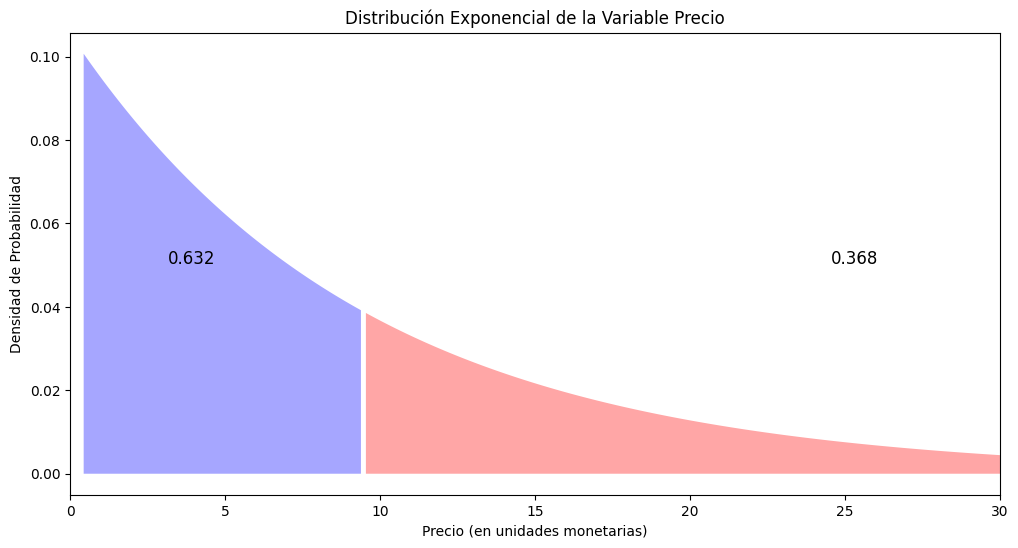

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Ajustar una distribución exponencial a la variable 'Price'
precio = df['Price'].dropna()  # Eliminar valores nulos para evitar errores
lambda_param = 1 / precio.mean()  # Parámetro de la distribución exponencial (1/media)

# Definir los rangos de la gráfica
x = np.linspace(0.440000, precio.max(), 1000)

# Calcular la función de densidad de probabilidad (PDF) de la distribución exponencial
pdf = lambda_param * np.exp(-lambda_param * x)

# Graficar las áreas
plt.figure(figsize=(12, 6))

# Calculate the where condition separately to ensure it matches the shape of x
where_below_mean = x <= precio.mean()

# Use the where condition in fill_between
plt.fill_between(x=x,  # Use the full x array
                 y1=pdf,  # Use the full pdf array
                 where=where_below_mean,  # Apply the where condition for below mean
                 facecolor='blue',
                 alpha=0.35)

# Similarly for above mean
where_above_mean = x > precio.mean()
plt.fill_between(x=x,
                 y1=pdf,
                 where=where_above_mean,
                 facecolor='red',
                 alpha=0.35)

# Agregar texto a la gráfica
prob_1 = stats.expon.cdf(precio.mean(), scale=1/lambda_param)
plt.text(x=precio.mean()/3, y=pdf.max()/2, s=f"{round(prob_1, 3)}", fontsize=12)
plt.text(x=precio.mean() + (precio.max() - precio.mean()) * 0.1, 
         y=pdf.max() / 2, 
         s=f"{round(1 - prob_1, 3)}", 
         fontsize=12)


# Personalizar la gráfica
plt.title('Distribución Exponencial de la Variable Precio')
plt.xlabel('Precio (en unidades monetarias)')
plt.ylabel('Densidad de Probabilidad')
plt.xlim(0,30)
plt.show()


DISTRIBUCIÓN EXPONENCIAL DE LA VARIABLE PRECIO

In [32]:
from scipy import stats

# Definir la muestra (por ejemplo, la columna 'Price')
muestra = df['Price'].dropna()  # Eliminar valores nulos

# Valor hipotético de la media (por ejemplo, 10)
media_hipotetica = 10

# Realizar la prueba t de una muestra
t_stat, p_value = stats.ttest_1samp(muestra, media_hipotetica)

# Imprimir los resultados
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpretación básica
if p_value < 0.05:
    print("Hay evidencia suficiente para rechazar la hipótesis nula. La media de la muestra es significativamente diferente al valor hipotético.")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula. La media de la muestra no es significativamente diferente al valor hipotético.")

T-Statistic: -3.609608265636996
P-Value: 0.0003091532375662232
Hay evidencia suficiente para rechazar la hipótesis nula. La media de la muestra es significativamente diferente al valor hipotético.


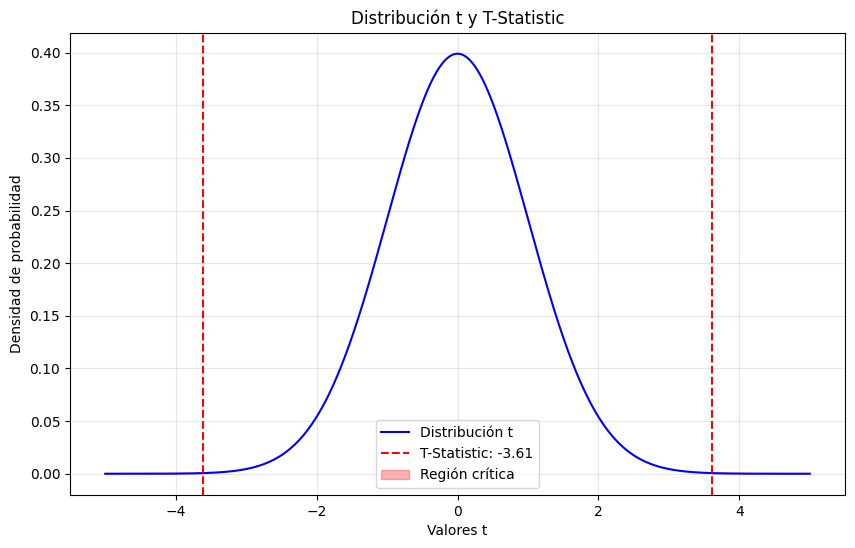

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Parámetros de la muestra y la prueba
df_t = len(muestra) - 1  # Grados de libertad
x = np.linspace(-5, 5, 1000)  # Rango para la distribución teórica t

# Calcular la distribución t teórica
t_dist = t.pdf(x, df=df_t)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, t_dist, label="Distribución t", color="blue")  # Distribución t
plt.axvline(x=t_stat, color="red", linestyle="--", label=f"T-Statistic: {t_stat:.2f}")  # Línea para t-stat
plt.axvline(x=-t_stat, color="red", linestyle="--")  # Simetría de t-stat en dos colas
plt.fill_between(x, 0, t_dist, where=(x <= -abs(t_stat)) | (x >= abs(t_stat)), color='red', alpha=0.3, label="Región crítica")

# Etiquetas y leyenda
plt.title("Distribución t y T-Statistic")
plt.xlabel("Valores t")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(alpha=0.3)

# Mostrar el gráfico
plt.show()


In [34]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand', 'power'],
      dtype='object')

In [ ]:
grupos = df['grupo'].unique()

# Crear listas de valores para cada grupo
grupos_valores = [df[df['grupo'] == grupo]['valor'].values for grupo in grupos]

# Realizar el ANOVA
f_stat, p_value = f_oneway(*grupos_valores)

print(f"Estadístico F: {f_stat}")
print(f"Valor p: {p_value}")

# Interpretación
if p_value < 0.05:
    print("Hay diferencias significativas entre al menos dos grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")

In [38]:
from scipy.stats import f_oneway, ttest_ind
from itertools import combinations
# Limpiar nombres de columnas (eliminar espacios o caracteres no deseados)
df.columns = df.columns.str.strip()

In [45]:
df.columns

Index(['Fuel_Type', 'Price'], dtype='object')

In [55]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand', 'power'],
      dtype='object')

In [54]:
from scipy import stats

# Definir variables independientes y dependientes
variable_independiente = 'Kilometres_Driven'  # Cambia según tu columna
variable_dependiente = 'Price'

# Filtrar datos no nulos
df = df[[variable_independiente, variable_dependiente]].dropna()

# Comprobar valores únicos en la variable independiente
valores_unicos = df[variable_independiente].unique()
print(f"Valores únicos de la variable independiente: {valores_unicos}")

# Crear grupos por cada categoría en la variable independiente
grupos = {valor: df[df[variable_independiente] == valor][variable_dependiente] for valor in valores_unicos}

# Realizar ANOVA
f_stat, p_value = stats.f_oneway(*grupos.values())
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretación
if p_value < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")


KeyError: "['Kilometres_Driven'] not in index"

In [ ]:
from scipy import stats
import pandas as pd

df.columns = df.columns.str.strip()

variable_independiente = 'Kilometers_Driven'  # Kilometraje
variable_dependiente = 'Price'  # Precio

df = df[[variable_independiente, variable_dependiente]].dropna()

bins = [0, 20000, 40000, 60000, 80000, 100000, 150000, float('inf')]
labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-150k', '150k+']
df['Kilometers_Binned'] = pd.cut(df[variable_independiente], bins=bins, labels=labels, right=False)

valores_unicos = df['Kilometers_Binned'].unique()
print(f"Valores únicos de la variable 'Kilometers_Binned': {valores_unicos}")

grupos = {valor: df[df['Kilometers_Binned'] == valor][variable_dependiente] for valor in valores_unicos}

f_stat, p_value = stats.f_oneway(*grupos.values())

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretación
if p_value < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")


Valores únicos de la variable 'Kilometers_Binned': ['60k-80k', '40k-60k', '80k-100k', '20k-40k', '100k-150k', '150k+', '0-20k']
Categories (7, object): ['0-20k' < '20k-40k' < '40k-60k' < '60k-80k' < '80k-100k' < '100k-150k' < '150k+']
F-Statistic: 42.89792379265535
P-Value: 1.449378553889059e-51
Hay diferencias significativas entre los grupos.


C:\Users\capor\AppData\Local\Temp\ipykernel_27528\1428660340.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Kilometers_Binned', y='Price', data=df, palette="Set3")


<Figure size 1000x600 with 0 Axes>

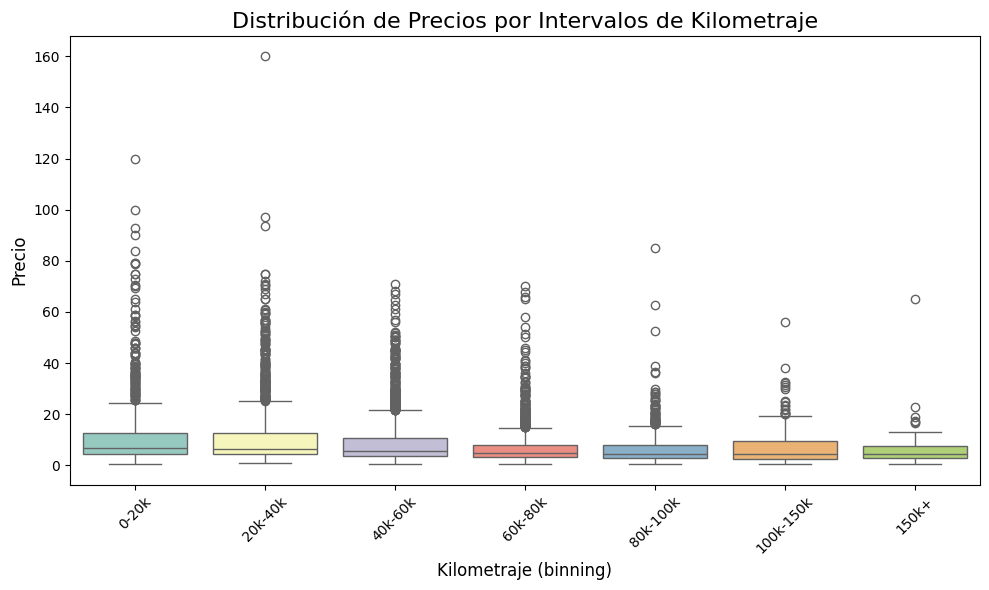

In [59]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Kilometers_Binned', y='Price', data=df, palette="Set3")
plt.title('Distribución de Precios por Intervalos de Kilometraje', fontsize=16)
plt.xlabel('Kilometraje (binning)', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Valores únicos de la variable 'Kilometers_Binned': ['60k-80k', '40k-60k', '80k-100k', '20k-40k', '100k-150k', '150k+', '0-20k']
Categories (7, object): ['0-20k' < '20k-40k' < '40k-60k' < '60k-80k' < '80k-100k' < '100k-150k' < '150k+']
                             sum_sq      df          F        PR(>F)
C(Kilometers_Binned)   30925.239441     6.0  42.897924  1.449379e-51
Residual              722344.747258  6012.0        NaN           NaN

Realizando test post-hoc de Tukey...


C:\Users\capor\AppData\Local\Temp\ipykernel_27528\579774922.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_result['PR(>F)'][0] < 0.05:


    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower    upper  reject
-----------------------------------------------------------
    0-20k 100k-150k  -6.7362    0.0  -8.7936 -4.6787   True
    0-20k     150k+  -7.4188    0.0 -10.5788 -4.2587   True
    0-20k   20k-40k  -1.8943 0.0082  -3.4853 -0.3033   True
    0-20k   40k-60k  -3.8324    0.0  -5.3872 -2.2775   True
    0-20k   60k-80k  -6.2586    0.0  -7.8548 -4.6625   True
    0-20k  80k-100k   -6.555    0.0  -8.4074 -4.7026   True
100k-150k     150k+  -0.6826 0.9964  -3.9546  2.5894  False
100k-150k   20k-40k   4.8419    0.0   3.0388  6.6451   True
100k-150k   40k-60k   2.9038    0.0   1.1325  4.6752   True
100k-150k   60k-80k   0.4776  0.987  -1.3301  2.2853  False
100k-150k  80k-100k   0.1812    1.0  -1.8563  2.2187  False
    150k+   20k-40k   5.5245    0.0   2.5238  8.5252   True
    150k+   40k-60k   3.5864 0.0072   0.6047  6.5681   True
    150k+   60k-80k   1.1601  0.916  -1.

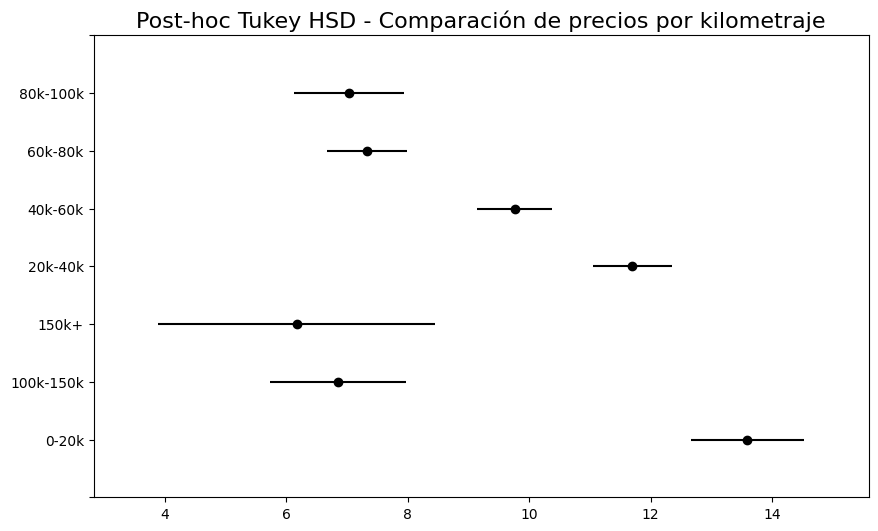

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Asegúrate de que los nombres de las columnas sean correctos y que no tengan espacios extra
df.columns = df.columns.str.strip()

# Definir las variables
variable_independiente = 'Kilometers_Driven'  # Kilometraje
variable_dependiente = 'Price'  # Precio

# Filtrar datos no nulos
df = df[[variable_independiente, variable_dependiente]].dropna()

# Crear categorías de 'Kilometers_Driven' en intervalos (puedes ajustar estos rangos según tus datos)
bins = [0, 20000, 40000, 60000, 80000, 100000, 150000, float('inf')]
labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-150k', '150k+']
df['Kilometers_Binned'] = pd.cut(df[variable_independiente], bins=bins, labels=labels, right=False)

# Verifica los valores únicos en los binarios
valores_unicos = df['Kilometers_Binned'].unique()
print(f"Valores únicos de la variable 'Kilometers_Binned': {valores_unicos}")

# Crear un modelo ANOVA usando OLS
modelo = ols('Price ~ C(Kilometers_Binned)', data=df).fit()
anova_result = sm.stats.anova_lm(modelo, typ=2)

# Mostrar los resultados de ANOVA
print(anova_result)

# Si la prueba ANOVA es significativa, realizamos un test post-hoc (Tukey)
if anova_result['PR(>F)'][0] < 0.05:
    print("\nRealizando test post-hoc de Tukey...")
    
    # Realizar el test post-hoc de Tukey
    tukey_result = pairwise_tukeyhsd(df['Price'], df['Kilometers_Binned'], alpha=0.05)
    
    # Mostrar resultados
    print(tukey_result)
    
    # Graficar resultados de Tukey
    tukey_result.plot_simultaneous()
    plt.title('Post-hoc Tukey HSD - Comparación de precios por kilometraje', fontsize=16)
    plt.show()
else:
    print("\nNo se encontraron diferencias significativas en el ANOVA, por lo que no es necesario realizar un post-hoc.")


In [67]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Ejemplo de datos
df = pd.DataFrame({'Price': [72000, 41000, 46000, 87000, 40670, 75000, 86999, 36000]})

# Estimación puntual de la media
media_muestral = df['Price'].mean()

# Estimación puntual de la desviación estándar
desviacion_muestral = df['Price'].std()

# Tamaño de la muestra
n = len(df)

# Grados de libertad
df_libre = n - 1

# Nivel de confianza (95%)
nivel_confianza = 0.95

# Valor crítico t para 95% de confianza
t_critico = stats.t.ppf(1 - (1 - nivel_confianza) / 2, df_libre)

# Error estándar de la media
error_estandar = desviacion_muestral / np.sqrt(n)

# Intervalo de confianza de la media (95%)
margen_error = t_critico * error_estandar
limite_inferior = media_muestral - margen_error
limite_superior = media_muestral + margen_error

# Resultados
print(f"Estimación puntual de la media: {media_muestral}")
print(f"Intervalo de confianza del 95%: ({limite_inferior}, {limite_superior})")


Estimación puntual de la media: 60583.625
Intervalo de confianza del 95%: (42346.895158495594, 78820.3548415044)


In [68]:
# Estimación puntual de la varianza
varianza_muestral = df['Price'].var()

# Valor crítico chi-cuadrado para el intervalo de confianza (95%)
chi2_critico_izq = stats.chi2.ppf(1 - (nivel_confianza / 2), df_libre)
chi2_critico_der = stats.chi2.ppf(nivel_confianza / 2, df_libre)

# Intervalo de confianza para la varianza
limite_inferior_var = (n - 1) * varianza_muestral / chi2_critico_izq
limite_superior_var = (n - 1) * varianza_muestral / chi2_critico_der

# Resultados
print(f"Estimación puntual de la varianza: {varianza_muestral}")
print(f"Intervalo de confianza para la varianza: ({limite_inferior_var}, {limite_superior_var})")


Estimación puntual de la varianza: 475838565.125
Intervalo de confianza para la varianza: (506996355.47614235, 543637158.5160004)
